In [1]:
import pandas as pd
import numpy as np

In [2]:
import os
os.getcwd()

'C:\\Users\\BHAVYA OJHA'

In [3]:
os.chdir(r"C:\Users\BHAVYA OJHA\OneDrive\Documents\Downloads")


In [4]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [5]:
df = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1564,ham,Tmrw. Im finishing 9 doors,NaN,NaN,NaN
2879,spam,Last Chance! Claim ur å£150 worth of discount ...,NaN,NaN,NaN
1651,ham,I wan but too early lei... Me outside now wun ...,NaN,NaN,NaN
4726,spam,Had your mobile 10 mths? Update to the latest ...,NaN,NaN,NaN
1608,ham,Are your freezing ? Are you home yet ? Will yo...,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
#data cleaning 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
778,ham,Happy New year my dear brother. I really do mi...
1482,ham,Ok...
3221,ham,"Hi, my love! How goes that day? Fuck, this mor..."
2908,spam,URGENT! Your Mobile number has been awarded wi...
3346,ham,No problem baby. Is this is a good time to tal...


In [10]:
#rename columns 
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(5)

,Target,Text
5350,ham,No one interested. May be some business plan.
2359,spam,Spook up your mob with a Halloween collection ...
829,ham,Thanks for yesterday sir. You have been wonder...
4745,ham,Orh i tot u say she now still dun believe.
2061,ham,Hey ! I want you ! I crave you ! I miss you ! ...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder

In [12]:
df.head(5)

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep='first')

In [16]:

df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

In [18]:
df.value_counts()

Target  Text                                                                                                                              
ham      &lt;#&gt;  in mca. But not conform.                                                                                                  1
        Thats cool. i liked your photos. You are very sexy!                                                                                   1
        That's good, because I need drugs                                                                                                     1
        That's fine, have him give me a call if he knows what he wants or has any questions                                                   1
        That's fine, I'll bitch at you about it later then                                                                                    1
                                                                                                                                             

In [19]:
df['Target'].value_counts()

ham     4516
spam     653
Name: Target, dtype: int64

([<matplotlib.patches.Wedge at 0x22e68ce5850>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

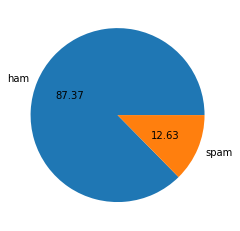

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')

In [21]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\BHAVYA
[nltk_data]     OJHA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
df['num_characters']=df['Text'].apply(len)

In [24]:
df.head(5)

,Target,Text,num_characters
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head(5)

,Target,Text,num_characters,num_words
0,ham,"Go until jurong point, crazy.. Available only ...",111,24
1,ham,Ok lar... Joking wif u oni...,29,8
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,ham,U dun say so early hor... U c already then say...,49,13
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15


In [27]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head(5)

,Target,Text,num_characters,num_words,num_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [30]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

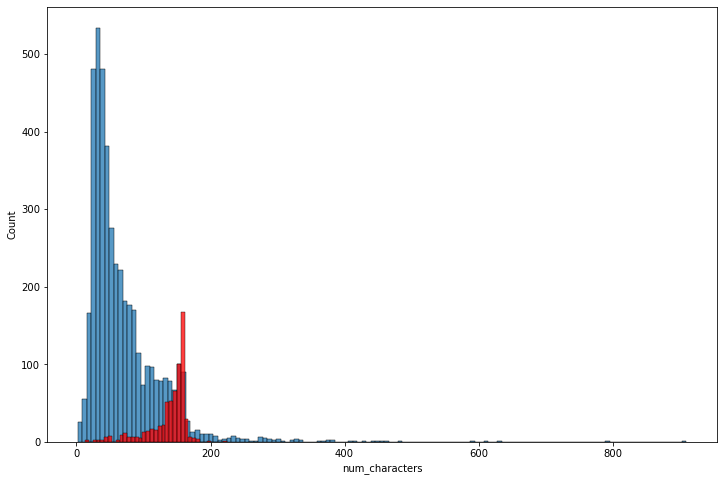

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']=='ham']['num_characters'])
sns.histplot(df[df['Target']=='spam']['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

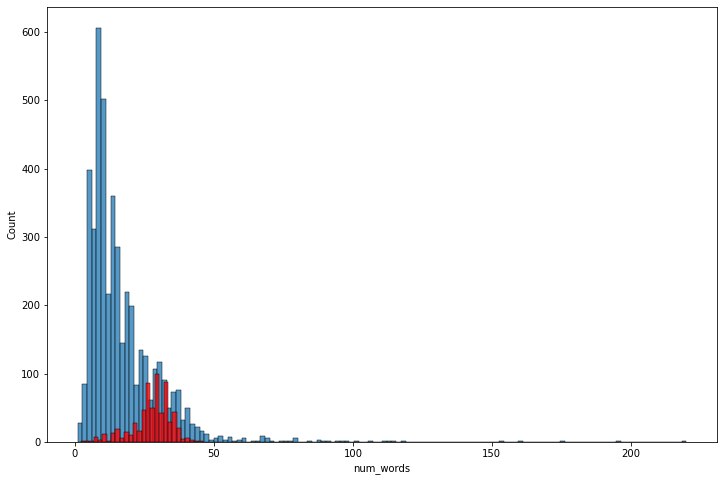

In [32]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']=='ham']['num_words'])
sns.histplot(df[df['Target']=='spam']['num_words'],color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

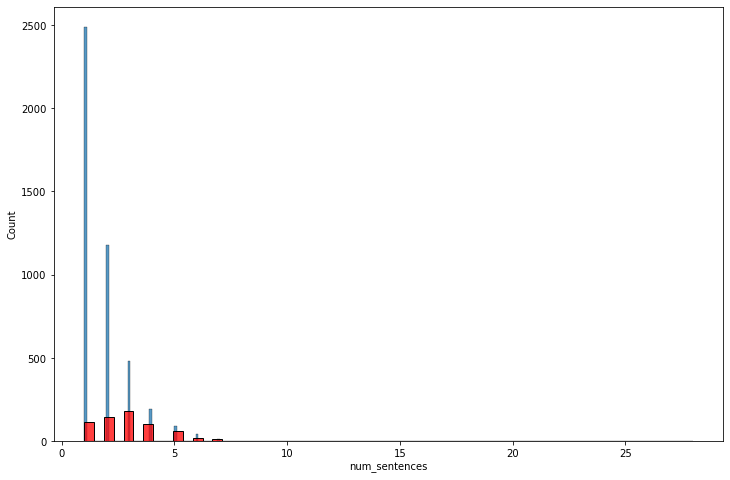

In [33]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['Target']=='ham']['num_sentences'])
sns.histplot(df[df['Target']=='spam']['num_sentences'],color='red')

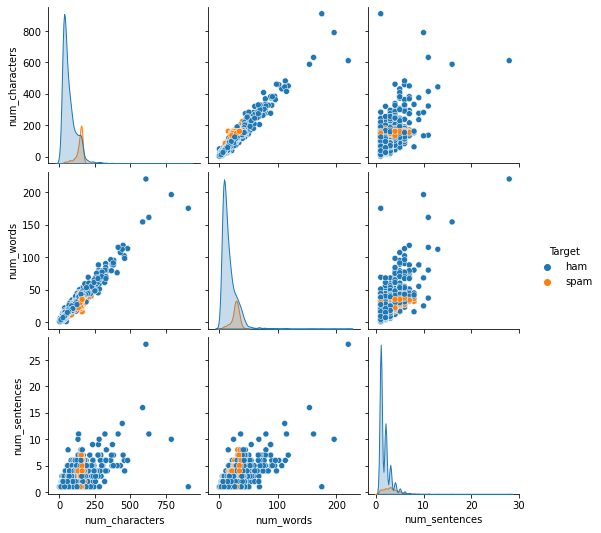

In [34]:
sns.pairplot(df,hue='Target')

<AxesSubplot:>

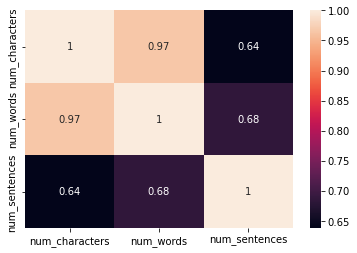

In [35]:
sns.heatmap(df.corr(),annot=True)

In [36]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer 
ps=PorterStemmer()


In [37]:
def transform_text(Text):
    Text=Text.lower()
    Text=nltk.word_tokenize(Text)
    
    y=[]
    for i in Text:
        if i.isalnum():
            y.append(i)
    Text=y[:]
    y.clear()
    
    for i in Text:
        if i not in stopwords.words('english ') and i not in string.punctuation:
            y.append(i)
    Text = y[:]
    y.clear()
    
    for i in Text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [38]:
transform_text('Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx')

'okay name ur price long legal wen pick u ave x am xx'

In [39]:
df['Text'][100]

'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx'

In [65]:
df['transformed_text']=df['Text'].apply(transform_text)

In [66]:
df.head(5)

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [67]:
from wordcloud import WordCloud
wc = WordCloud (width= 500,height = 500,min_font_size=10,background_color='white')

In [68]:
spam_wc=wc.generate(df[df['Target']=='spam']['transformed_text'].str.cat(sep=''))

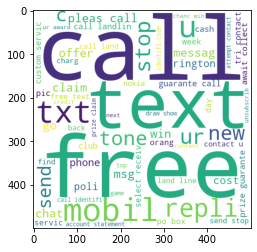

In [69]:
plt.imshow(spam_wc)

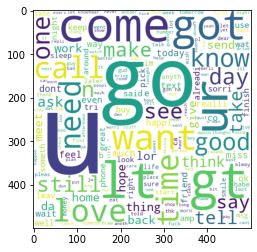

In [45]:
ham_wc=wc.generate(df[df['Target']=='ham']['transformed_text'].str.cat(sep=''))
plt.imshow(ham_wc)

In [70]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [71]:
spam_corpus=[]
for msg in df[df['Target']=='spam']['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [97]:
len(spam_corpus)

9939

In [108]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(30))


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [110]:
ham_corpus=[]
for msg in df[df['Target']=='ham']['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [111]:
len(ham_corpus)

35394

In [112]:
from collections import Counter
pd.DataFrame(Counter(ham_corpus).most_common(30))


,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


# Model BUILDING


In [159]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [163]:
X= tfidf.fit_transform(df['transformed_text']).toarray()


In [164]:
X.shape

(5169, 6708)

In [165]:
y= df['Target'].values

In [166]:
y

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype=object)

In [167]:
from sklearn.model_selection import train_test_split

In [168]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=2)

In [169]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [170]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [171]:

gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1,pos_label='spam'))


0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [172]:

mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2,pos_label='spam'))


0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [173]:

bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3,pos_label='spam'))


0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [ ]:
#tfidf->mnb

In [176]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

In [179]:

lg=LogisticRegression()
lg.fit(X_train, y_train)
lg.score(X_train, y_train)
pred_lg=lg.predict(X_test)

print("accuracy score: ",accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

accuracy score:  0.9468085106382979
[[895   1]
 [ 54  84]]
              precision    recall  f1-score   support

         ham       0.94      1.00      0.97       896
        spam       0.99      0.61      0.75       138

    accuracy                           0.95      1034
   macro avg       0.97      0.80      0.86      1034
weighted avg       0.95      0.95      0.94      1034

